<a href="https://colab.research.google.com/github/rana430/Income_prediction/blob/main/Income_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import math
!pip install category_encoders
import category_encoders as ce
np.random.seed(42)
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train=pd.read_csv('train_data.csv')

In [ ]:
test=pd.read_csv('test_data.csv')

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8890 entries, 0 to 8889
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8890 non-null   int64  
 1   workclass       8890 non-null   object 
 2   fnlwgt          8890 non-null   int64  
 3   education       8890 non-null   object 
 4   education-num   8890 non-null   int64  
 5   marital-status  8890 non-null   object 
 6   occupation      8890 non-null   object 
 7   relationship    8890 non-null   object 
 8   race            8890 non-null   object 
 9   sex             8889 non-null   object 
 10  capital-gain    8889 non-null   float64
 11  capital-loss    8889 non-null   float64
 12  hours-per-week  8889 non-null   float64
 13  native-country  8889 non-null   object 
 14  Income          8889 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.0+ MB


In [ ]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,8890.000000,8.890000e+03,8890.000000,8889.000000,8889.000000,8889.000000
mean,38.432621,1.903043e+05,10.074016,1077.068399,89.058162,40.540218
std,13.563475,1.062198e+05,2.546525,7370.397238,402.339076,12.333672
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178690e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785760e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.384670e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3004.000000,99.000000


In [ ]:
train.shape

(32561, 15)

In [ ]:
train.isna().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

No Null values in our data 

In [ ]:
train.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

We have many '?' which is null values

#First lets deal with these null values

In [ ]:
train=train.replace(' ?',np.NaN)

In [ ]:
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [ ]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

No null values

#Exploring Data

In [ ]:
catergorical=train.select_dtypes(exclude="number").columns
for i in catergorical:
    print(i)
    print(train[i].unique().sum())
    print("*********************************")

workclass
 State-gov Self-emp-not-inc Private Federal-gov Local-gov Self-emp-inc Without-pay Never-worked
*********************************
education
 Bachelors HS-grad 11th Masters 9th Some-college Assoc-acdm Assoc-voc 7th-8th Doctorate Prof-school 5th-6th 10th 1st-4th Preschool 12th
*********************************
marital-status
 Never-married Married-civ-spouse Divorced Married-spouse-absent Separated Married-AF-spouse Widowed
*********************************
occupation
 Adm-clerical Exec-managerial Handlers-cleaners Prof-specialty Other-service Sales Craft-repair Transport-moving Farming-fishing Machine-op-inspct Tech-support Protective-serv Armed-Forces Priv-house-serv
*********************************
relationship
 Not-in-family Husband Wife Own-child Unmarried Other-relative
*********************************
race
 White Black Asian-Pac-Islander Amer-Indian-Eskimo Other
*********************************
sex
 Male Female
*********************************
native-country
 United-

No order in Workclass col , so OneHotEncoder will be suitable choice

##Male to Female

In [ ]:
train['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

it is clear that male is much more female

###income and sex

Text(0.5, 1.0, 'Sex to Income')

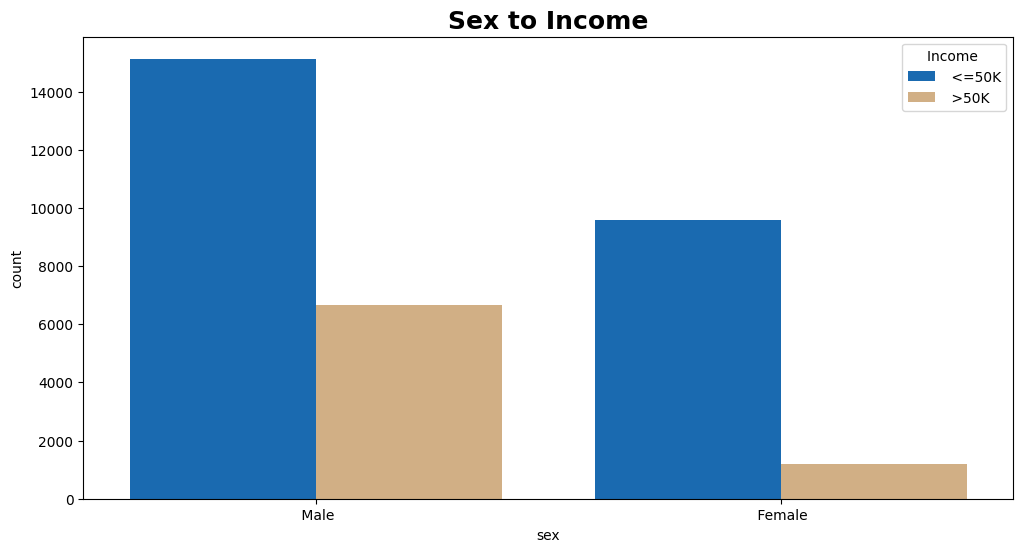

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['sex'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex to Income', fontsize=18, fontweight='bold')


**Male has more chace to get more than 50K than that of female**

###income and relationship

Text(0.5, 1.0, 'Sex and relationship')

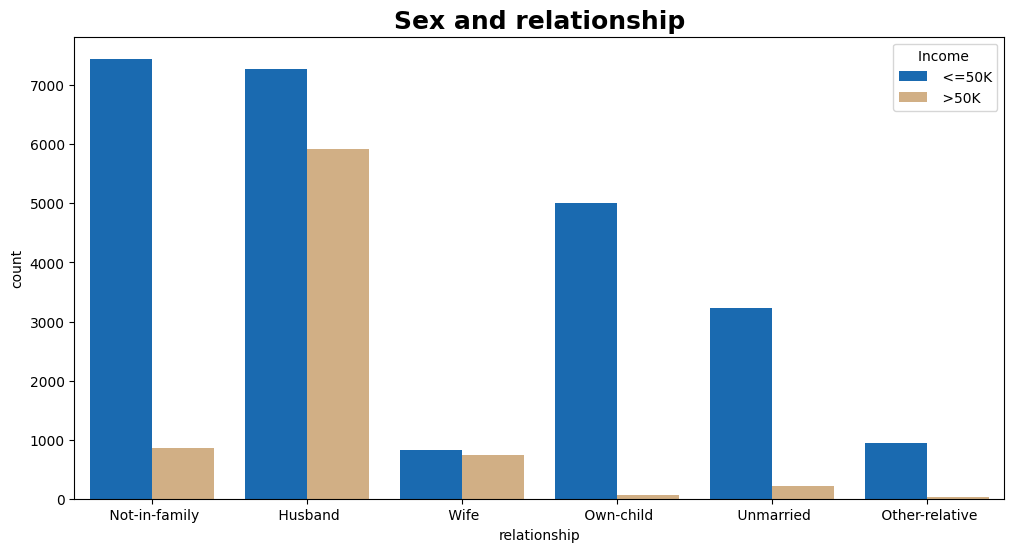

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['relationship'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex and relationship', fontsize=18, fontweight='bold')

###Income and matrial status

Text(0.5, 1.0, 'Sex and marital Status')

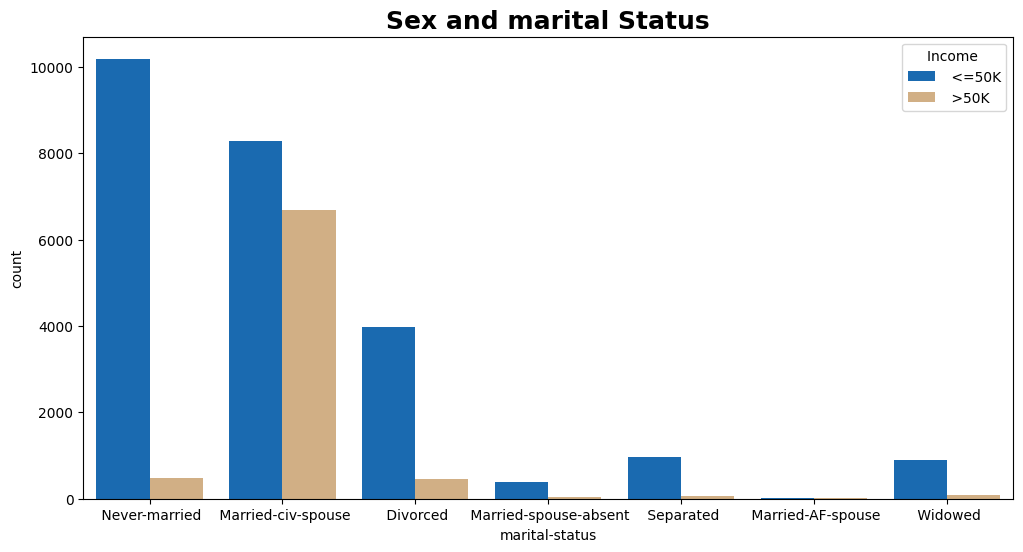

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['marital-status'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex and marital Status', fontsize=18, fontweight='bold')

**the chance of Married Status have more chance to get more 50k than that of non Married**

### Income and Occupation

Text(0.5, 1.0, 'Sex and Occupation')

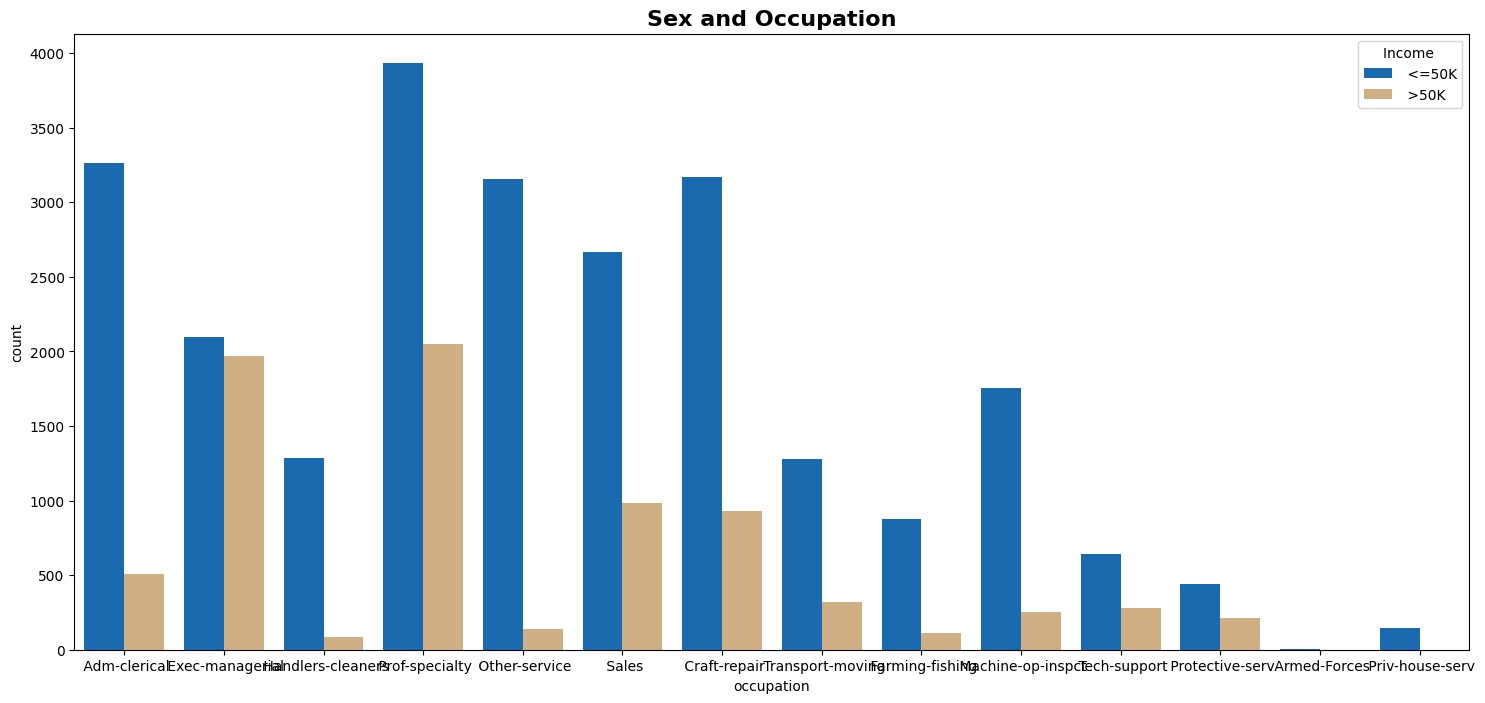

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=train['occupation'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex and Occupation', fontsize=16, fontweight='bold')


### Income and Races

Text(0.5, 1.0, 'Sex and Race')

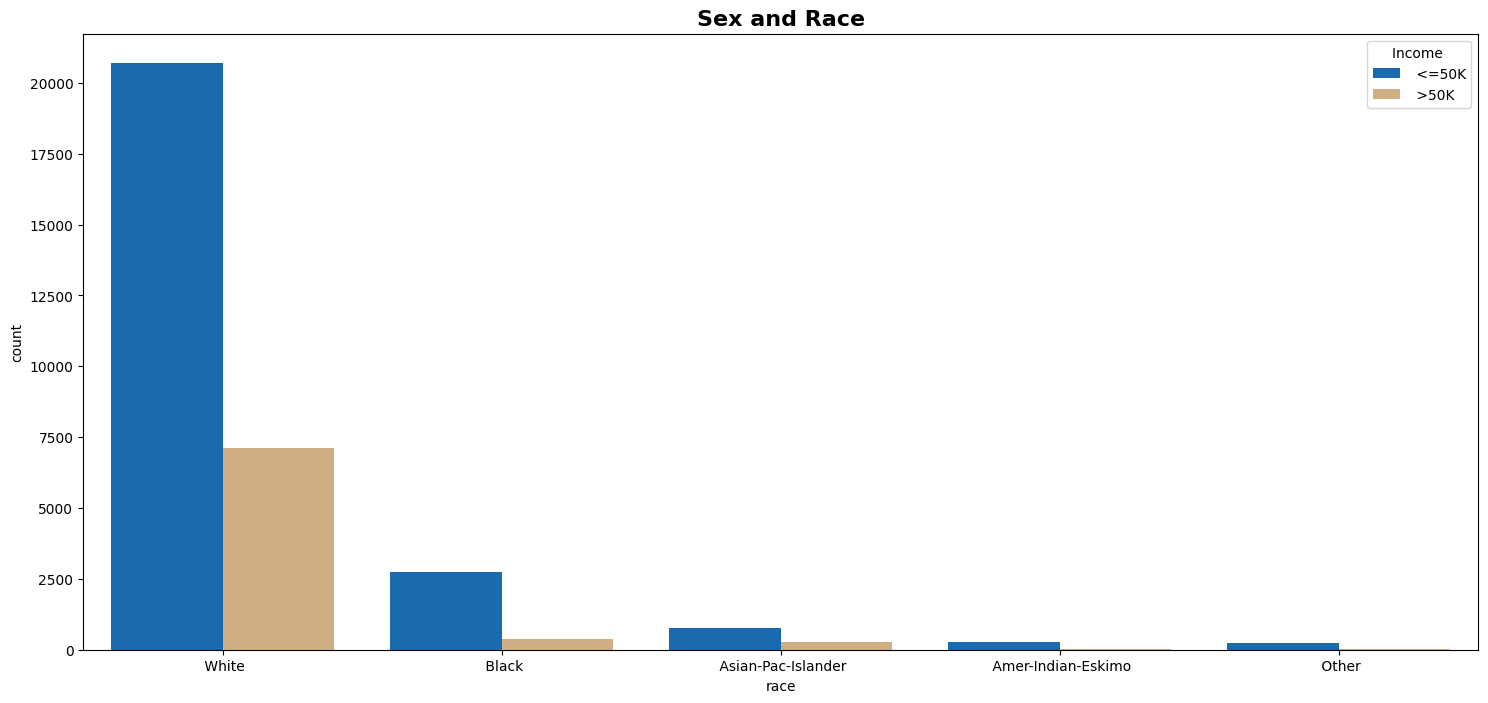

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=train['race'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex and Race', fontsize=16, fontweight='bold')


###Income and Native Countries

Text(0.5, 1.0, 'Sex and Native Countries')

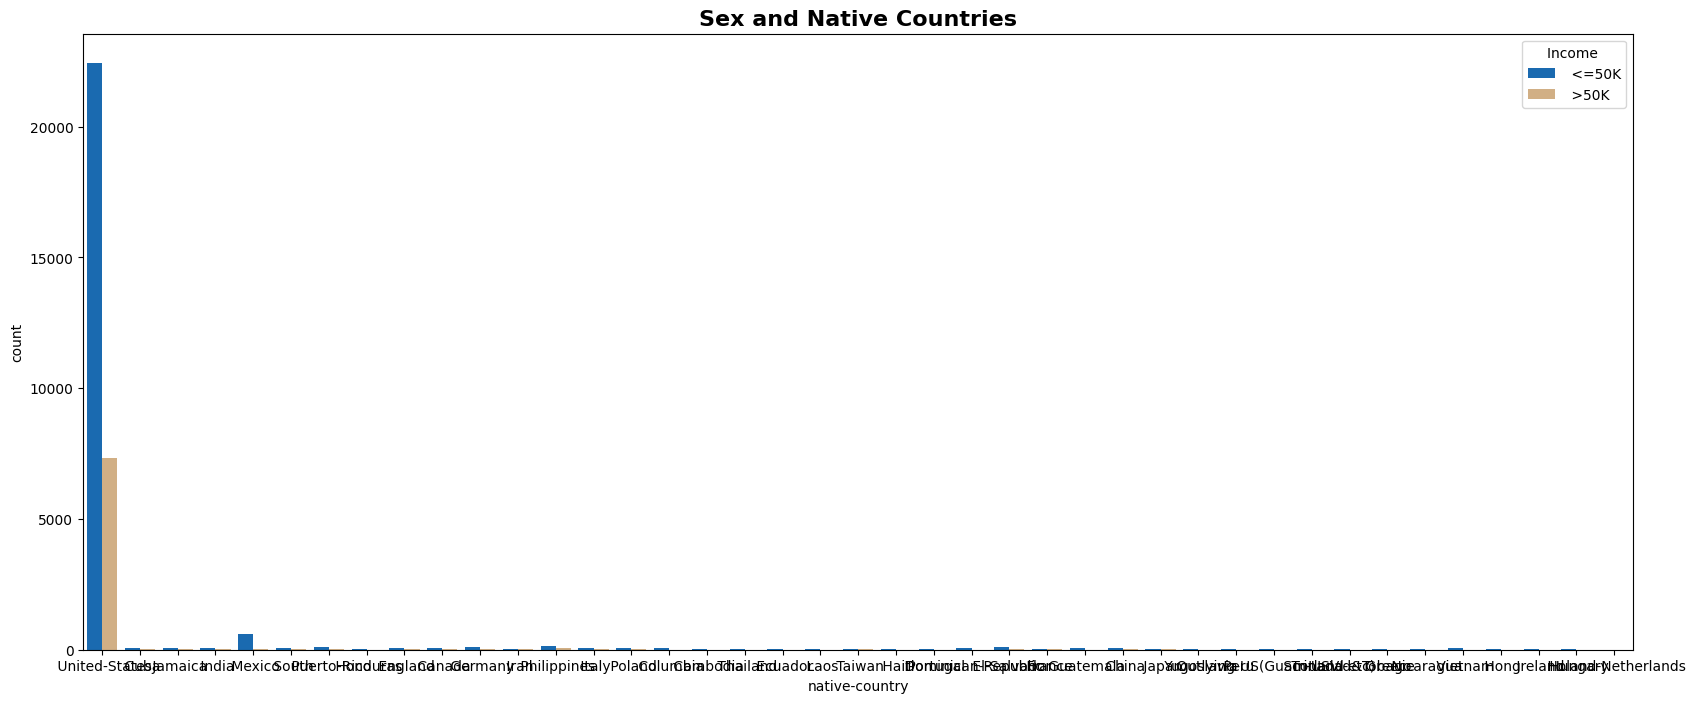

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=train['native-country'], hue = train['Income '],palette=['#016CC9','#DEB078'])
plt.title('Sex and Native Countries', fontsize=16, fontweight='bold')


In [ ]:
px.histogram(train, x='native-country', color="Income ", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

##Income and Numerical Data

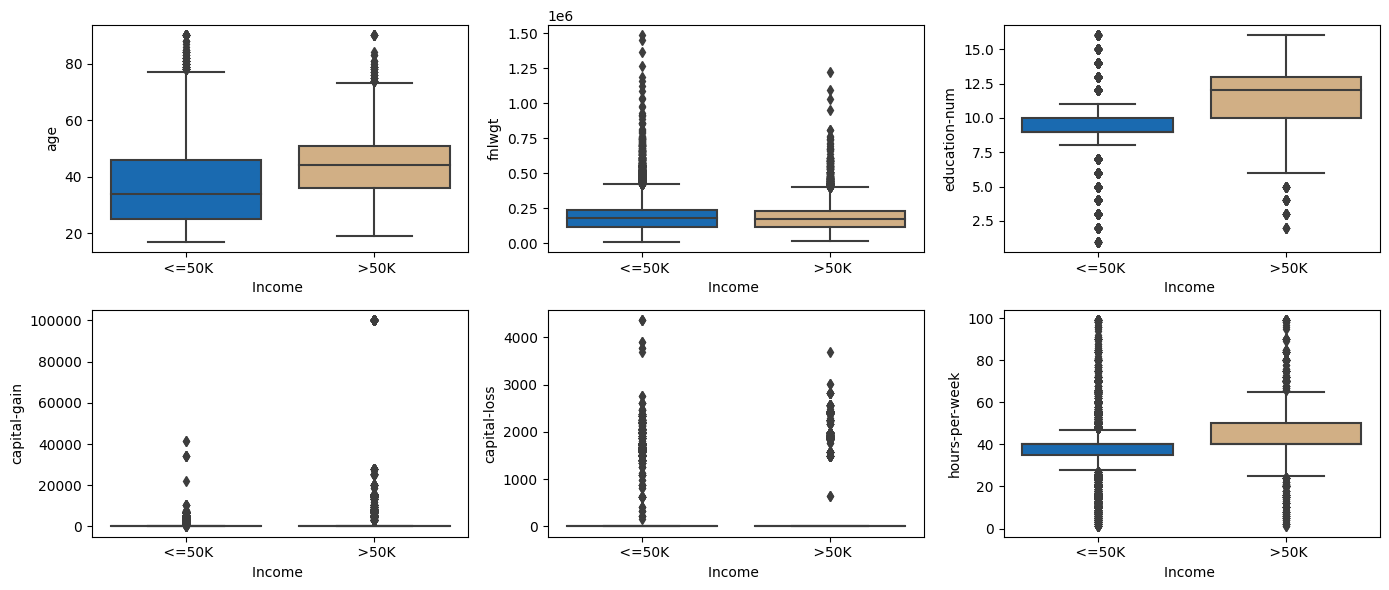

In [ ]:

p=train.select_dtypes(include='number').columns.to_list()
p.append("Income ")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,6))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=train,y=p[i-1],x='Income ',palette=['#016CC9','#DEB078'])
   
plt.tight_layout()    
plt.show()

AttributeError: ignored

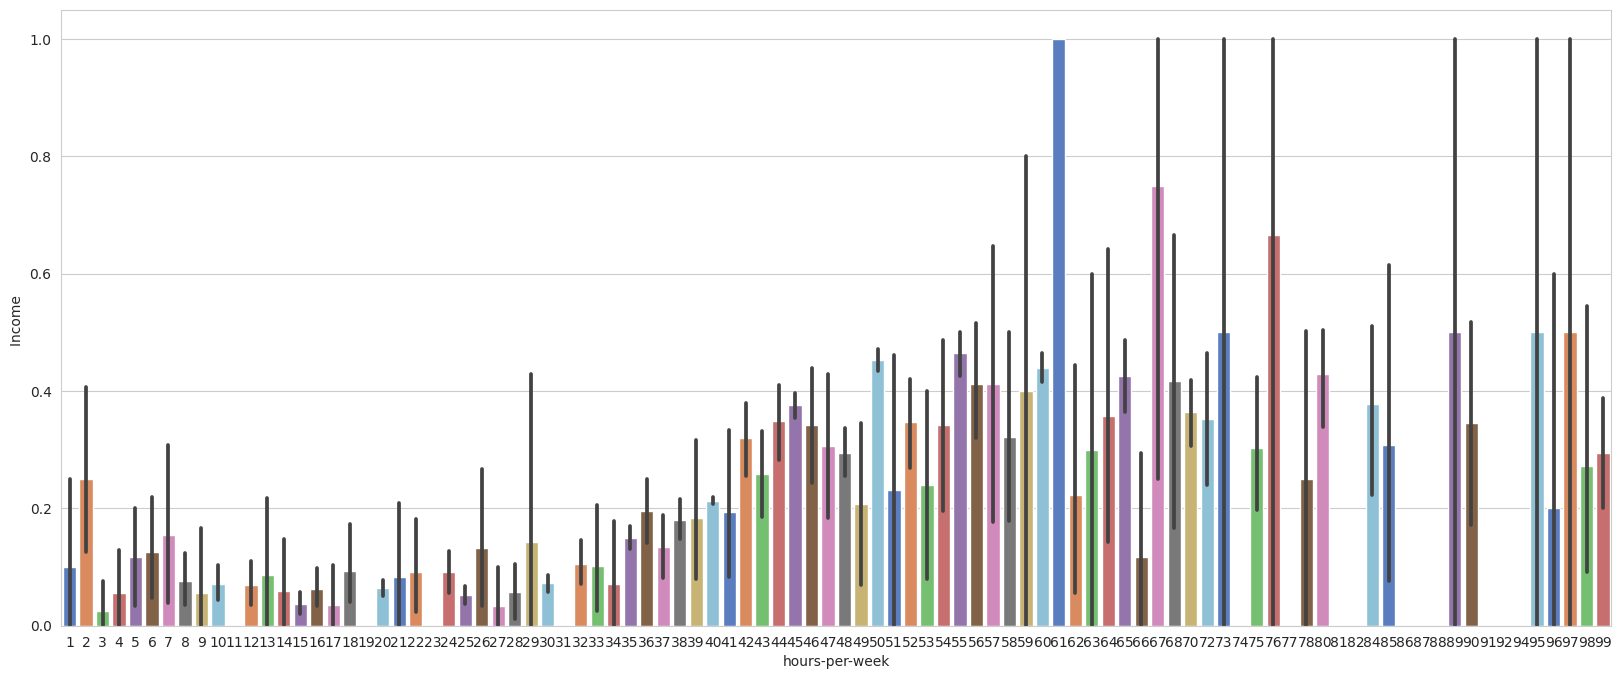

In [ ]:
plt.figure(figsize=(20,8))
g  = sns.barplot(x="hours-per-week",y="Income ",data=train,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

## Others Correlation between the other columns

In [ ]:
fig = px.imshow(train.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None)
fig.show()

<ipython-input-42-bf65add5f7bd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#Data preprossing

In [ ]:
binary_features = ['sex','marital-status','Income ']

nominal_features = ['workclass', 'occupation', 'native-country']

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
def binary_encode(train, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        train[column] = label_encoder.fit_transform(train[column])
    return train

def onehot_encode(train, columns):
    for column in columns:
        dummies = pd.get_dummies(train[column])
        train = pd.concat([train, dummies], axis=1)
        train.drop(column, axis=1, inplace=True)
    return train

def target_encode(train, columns):
    target= ce.TargetEncoder()
    for column in columns:
        train[column] = target.fit_transform(train[column],train['Income '])
    return train    

In [ ]:
train.drop(['education','fnlwgt','capital-gain','capital-loss'], inplace=True, axis=1)

### Cateriocal Data

In [ ]:
train['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
# Create Married Column - Binary Yes(1) or No(0)
train['marital-status'].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single',inplace=True)
train['marital-status'].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married',inplace=True)
binary_encode(train,binary_features)



,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,State-gov,13,1,Adm-clerical,Not-in-family,White,1,40,United-States,0
1,50,Self-emp-not-inc,13,0,Exec-managerial,Husband,White,1,13,United-States,0
2,38,Private,9,1,Handlers-cleaners,Not-in-family,White,1,40,United-States,0
3,53,Private,7,0,Handlers-cleaners,Husband,Black,1,40,United-States,0
4,28,Private,13,0,Prof-specialty,Wife,Black,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,0,Tech-support,Wife,White,0,38,United-States,0
32557,40,Private,9,0,Machine-op-inspct,Husband,White,1,40,United-States,1
32558,58,Private,9,1,Adm-clerical,Unmarried,White,0,40,United-States,0
32559,22,Private,9,1,Adm-clerical,Own-child,White,1,20,United-States,0


In [ ]:
train['marital-status'].unique()

array([1, 0])

In [ ]:
train['sex'].unique()

array([1, 0])

In [ ]:
train['Income '].unique()

array([0, 1])

In [ ]:
ordinaldata=['workclass', 'occupation', 'native-country']

In [ ]:
target_encode(train,ordinaldata)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,0.271957,13,1,0.134483,Not-in-family,White,1,40,0.245925,0
1,50,0.284927,13,0,0.484014,Husband,White,1,13,0.245925,0
2,38,0.210093,9,1,0.062774,Not-in-family,White,1,40,0.245925,0
3,53,0.210093,7,0,0.062774,Husband,Black,1,40,0.245925,0
4,28,0.210093,13,0,0.342637,Wife,Black,0,40,0.263146,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.210093,12,0,0.304957,Wife,White,0,38,0.245925,0
32557,40,0.210093,9,0,0.124875,Husband,White,1,40,0.245925,1
32558,58,0.210093,9,1,0.134483,Unmarried,White,0,40,0.245925,0
32559,22,0.210093,9,1,0.134483,Own-child,White,1,20,0.245925,0


In [ ]:
train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,0.271957,13,1,0.134483,Not-in-family,White,1,40,0.245925,0
1,50,0.284927,13,0,0.484014,Husband,White,1,13,0.245925,0
2,38,0.210093,9,1,0.062774,Not-in-family,White,1,40,0.245925,0
3,53,0.210093,7,0,0.062774,Husband,Black,1,40,0.245925,0
4,28,0.210093,13,0,0.342637,Wife,Black,0,40,0.263146,0


In [ ]:
df = pd.get_dummies(train['race'])
train = pd.concat([train, df], axis=1)
train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,0.271957,13,1,0.134483,Not-in-family,White,1,40,0.245925,0,0,0,0,0,1
1,50,0.284927,13,0,0.484014,Husband,White,1,13,0.245925,0,0,0,0,0,1
2,38,0.210093,9,1,0.062774,Not-in-family,White,1,40,0.245925,0,0,0,0,0,1
3,53,0.210093,7,0,0.062774,Husband,Black,1,40,0.245925,0,0,0,1,0,0
4,28,0.210093,13,0,0.342637,Wife,Black,0,40,0.263146,0,0,0,1,0,0


In [ ]:
df = pd.get_dummies(train['relationship'])
train = pd.concat([train, df], axis=1)

In [ ]:
train.drop(['race','relationship'], inplace=True, axis=1)

In [ ]:
train.head()

,age,workclass,education-num,marital-status,occupation,sex,hours-per-week,native-country,Income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,0.271957,13,1,0.134483,1,40,0.245925,0,0,0,0,0,1,0,1,0,0,0,0
1,50,0.284927,13,0,0.484014,1,13,0.245925,0,0,0,0,0,1,1,0,0,0,0,0
2,38,0.210093,9,1,0.062774,1,40,0.245925,0,0,0,0,0,1,0,1,0,0,0,0
3,53,0.210093,7,0,0.062774,1,40,0.245925,0,0,0,1,0,0,1,0,0,0,0,0
4,28,0.210093,13,0,0.342637,0,40,0.263146,0,0,0,1,0,0,0,0,0,0,0,1


#dealing with test data

In [ ]:
catergorical=test.select_dtypes(exclude="number").columns
for i in catergorical:
    print(i)
    print(test[i].unique().sum())
    print("*********************************")

workclass
 Private Local-gov ? Self-emp-not-inc Federal-gov State-gov Self-emp-inc Without-pay Never-worked
*********************************
education
 11th HS-grad Assoc-acdm Some-college 10th Prof-school 7th-8th Bachelors Masters Doctorate 5th-6th Assoc-voc 9th 12th 1st-4th Preschool
*********************************
marital-status
 Never-married Married-civ-spouse Widowed Divorced Separated Married-spouse-absent Married-AF-spouse
*********************************
occupation
 Machine-op-inspct Farming-fishing Protective-serv ? Other-service Prof-specialty Craft-repair Adm-clerical Exec-managerial Tech-support Sales Priv-house-serv Transport-moving Handlers-cleaners Armed-Forces
*********************************
relationship
 Own-child Husband Not-in-family Unmarried Wife Other-relative
*********************************
race
 Black White Asian-Pac-Islander Other Amer-Indian-Eskimo
*********************************
sex
 Male Female
*********************************
native-country
 Uni

In [ ]:
test=test.replace(' ?',np.NaN)
for col in ['workclass', 'occupation', 'native-country']:
    test[col].fillna(test[col].mode()[0], inplace=True)
test.drop(['education','fnlwgt','capital-gain','capital-loss'], inplace=True, axis=1)    

In [ ]:
test.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K.


In [ ]:
test['marital-status'].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single',inplace=True)
test['marital-status'].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married',inplace=True)
binary_encode(test,binary_features)
target_encode(test,ordinaldata)
df = pd.get_dummies(test['race'])
test = pd.concat([test, df], axis=1)
df = pd.get_dummies(test['relationship'])
test = pd.concat([test, df], axis=1)

In [ ]:
test.drop(['race','relationship'], inplace=True, axis=1)

In [ ]:
test.isna().sum()

age                    0
workclass              0
education-num          0
marital-status         0
occupation             0
sex                    0
hours-per-week         0
native-country         0
Income                 0
 Amer-Indian-Eskimo    0
 Asian-Pac-Islander    0
 Black                 0
 Other                 0
 White                 0
 Husband               0
 Not-in-family         0
 Other-relative        0
 Own-child             0
 Unmarried             0
 Wife                  0
dtype: int64

# Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

## Preparing Data for modeling

In [ ]:
test_x= test.drop(columns=['Income '])
test_y = test['Income ']

In [ ]:
train_x=train.drop(columns=['Income '])
train_y = train['Income ']

In [ ]:
test_x.isna().sum()

age                    0
workclass              0
education-num          0
marital-status         0
occupation             0
sex                    0
hours-per-week         0
native-country         0
 Amer-Indian-Eskimo    0
 Asian-Pac-Islander    0
 Black                 0
 Other                 0
 White                 0
 Husband               0
 Not-in-family         0
 Other-relative        0
 Own-child             0
 Unmarried             0
 Wife                  0
dtype: int64

In [ ]:
logReq = LogisticRegression(random_state=42) 
logReq.fit(train_x, train_y) 
predic = logReq.predict(test_x) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###Accuracy of Logistic Regression

In [ ]:
acc_logReg = accuracy_score(test_y, predic)
print(acc_logReg*100)

82.8941711197101


In [ ]:

precision = precision_score(test_y, predic)
print("Precision:", precision)

recall = recall_score(test_y, predic)
print("Recall:", recall)

Precision: 0.6797695696374111
Recall: 0.5215808632345293


In [ ]:
f1 = f1_score(test_y, predic)
print("F1 score of LogisticRegression: ",f1)

F1 score of LogisticRegression:  0.5902604090039724


##Decision tree

In [ ]:
Dtree= DecisionTreeClassifier()
Dtree.fit(train_x, train_y)
predic = Dtree.predict(test_x)

###Accuracy of Decsion Tree

In [ ]:
acc_Dtree = accuracy_score(test_y, predic)
print(acc_Dtree*100)

78.23843744241753


In [ ]:

precision = precision_score(test_y, predic)
print("Precision:", precision)


recall = recall_score(test_y, predic)
print("Recall:", recall)

Precision: 0.5414500683994528
Recall: 0.5145605824232969


In [ ]:
f1 = f1_score(test_y, predic)
print("F1 score of LecisionTree: ", f1)

F1 score of LecisionTree:  0.5276629782695641


##SVC

In [ ]:
Lscv=LinearSVC(max_iter = 41000,random_state=44)
Lscv.fit(train_x,train_y)
xpred=Lscv.predict(train_x)
ypred=Lscv.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Accuracy of SVC

In [ ]:
acc_SVC = accuracy_score(test_y, ypred)
print(acc_SVC*100)

83.07843498556599


In [ ]:

precision = precision_score(test_y, ypred)
print("Precision:", precision)


recall = recall_score(test_y, ypred)
print("Recall:", recall)

Precision: 0.6914706914706915
Recall: 0.5122204888195527


In [ ]:
f1 = f1_score(test_y, ypred)
print("F1 score of SVC: ", f1)

F1 score of SVC:  0.5884988797610158


##Random Forest Classifier

In [ ]:
Rforest = RandomForestClassifier()
Rforest.fit(train_x, train_y)
ypred = Rforest.predict(test_x)

###Accuracy of Random Forest 

In [ ]:
acc_rand = accuracy_score(test_y, ypred)
print(acc_rand*100)

82.16325778514833


In [ ]:

precision = precision_score(test_y, ypred)
print("Precision:", precision)


recall = recall_score(test_y, ypred)
print("Recall:", recall)

Precision: 0.645910780669145
Recall: 0.5421216848673946


In [ ]:
f1 = f1_score(test_y, ypred)
print("F1 score of Random Forest Classifer: ", f1)

F1 score of Random Forest Classifer:  0.5894826123833756


In [ ]:
Xgb = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05,max_depth=4,gamma=0.11)
Xgb.fit(train_x, train_y)
predic = Xgb.predict(test_x)

###Accuracy of XGB

In [ ]:
acc_xgb = accuracy_score(test_y, predic)
print(acc_xgb*100)

83.7847798046803


In [ ]:
# Calculate precision
precision = precision_score(test_y, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(test_y, ypred)
print("Recall:", recall)

Precision: 0.645910780669145
Recall: 0.5421216848673946


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest',  'Linear SVC',
              'XGB', 
              'Decision Tree'],
    'Score': [ acc_logReg*100, 
              acc_rand*100, acc_SVC*100, 
              acc_xgb*100, acc_Dtree*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,XGB,83.784780
2,Linear SVC,83.078435
0,Logistic Regression,82.894171
1,Random Forest,82.163258
4,Decision Tree,78.238437


<Axes: title={'center': 'Model Score'}, xlabel='Score', ylabel='Percentage'>

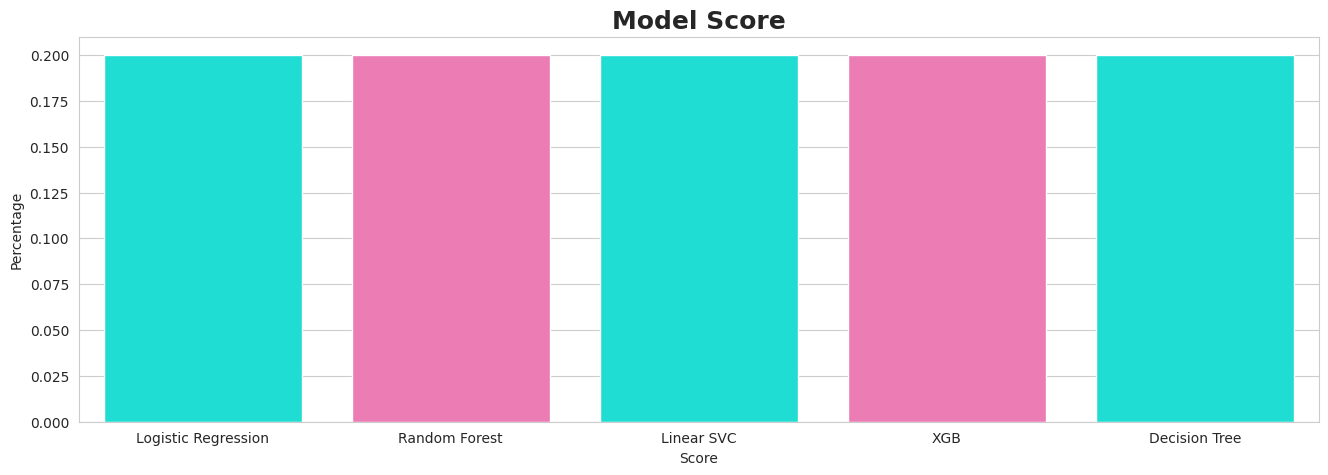

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,5))
plt.title('Model Score', fontsize=18, fontweight='bold')
score_percentage = models['Model'].value_counts(1).rename_axis('Score').reset_index(name = 'Percentage')
sns.barplot(x = 'Score', y = 'Percentage', data = score_percentage, palette=["#00fdf0","hotpink"])

In [ ]:

fig = px.funnel(models, x='Model', y='Score')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=models['Model'], y=models['Score'])])
fig.show()

In [ ]:
# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=models['Model'], y=models['Score'],
            text=y,
            textposition='auto',
        )])

fig.show()